# DNSC 6305 Final Group Project
#### Submitted by Group 10

In [6]:
import os

In [3]:
%load_ext sql

In [4]:
!dropdb -U student FinalProject

In [5]:
!createdb -U student FinalProject

In [4]:
%sql postgresql://student@/FinalProject

# Loading data and creating schemas in SQL
### Cases and Deaths 

In [7]:
%cd /home/ubuntu/notebooks/FinalProject

/home/ubuntu/notebooks/FinalProject


In [8]:
!wget -i cases.csv -p /home/ubuntu/notebooks/FinalProject

/home/ubuntu/notebooks/FinalProject: Scheme missing.
--2021-12-11 21:32:54--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8566 (8.4K) [text/plain]
Saving to: ‘raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv’

raw.githubuserconte 100%[===================>]   8.37K  --.-KB/s    in 0s      

2021-12-11 21:32:54 (67.0 MB/s) - ‘raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv’ saved [8566/8566]

--2021-12-11 21:32:54--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/css

In [9]:
%cd /home/ubuntu/notebooks/FinalProject/raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/

/home/ubuntu/notebooks/FinalProject/raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us


#### Filtering out data for only required date ranges (12th April 2020 - 15th November 2021)

In [10]:
!rm -f 01-*-2020

In [11]:
!rm -f 02-*-2020

In [12]:
!rm -f 03-*-2020

In [13]:
!rm -f 04-0*-2020

In [14]:
!rm -f 04-10-2020
!rm -f 04-11-2020

In [15]:
!rm -f 11-16-2021

In [16]:
!rm -f 11-17-2021

In [17]:
!rm -f 11-18-2021

In [18]:
!rm -f 11-19-2021

In [19]:
!rm -f 11-2*-2021

In [20]:
!pwd

/home/ubuntu/notebooks/FinalProject/raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us


In [21]:
!csvstack *.csv > casesanddeaths.csv

In [22]:
!mv casesanddeaths.csv /home/ubuntu/notebooks/FinalProject

In [7]:
%cd /home/ubuntu/notebooks/FinalProject

/home/ubuntu/notebooks/FinalProject


In [8]:
!head -n 1000 casesanddeaths.csv | csvstat

  1. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         58
	Longest value:         24 characters
	Most common values:    Alabama (18x)
	                       Alaska (18x)
	                       American Samoa (18x)
	                       Arizona (18x)
	                       Arkansas (18x)

  2. "Country_Region"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characters
	Most common values:    US (999x)

  3. "Last_Update"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         29
	Smallest value:        2021-01-02 05:30:44
	Largest value:         2021-01-19 09:30:34
	Most common values:    2021-01-02 05:30:44 (58x)
	                       2021-01-03 05:30:33 (58x)
	                       2021-01-04 05:30:45 (58x)
	                       2021-01-05 05:30:33 (58x)
	                       2021-01-06 05:30:39 (58x)

  4. "Lat"

	Type of data:

### Removing the non required values

In [9]:
!csvcut -C 2,13,15,16,18 casesanddeaths.csv > candcleaned.csv

#### SQL Table

In [10]:
%%sql
DROP TABLE IF EXISTS CASESANDDEATHS Cascade;

CREATE TABLE CASESANDDEATHS(
    PROVINCE_STATE      VARCHAR(64) NOT NULL,
    LAST_UPDATE         TIMESTAMP NULL,
    LATITUDE            NUMERIC(20,10),
    LONGITUDE           NUMERIC(20,10),
    CONFIRMED           NUMERIC,
    DEATHS              NUMERIC,
    RECOVERED           NUMERIC,
    ACTIVE              NUMERIC,
    FIPS                NUMERIC,
    INCIDENT_RATE       NUMERIC,
    TOTAL_TEST_RESULT   NUMERIC,
    CASE_FATILITY_RATIO NUMERIC,
    TESTING_RATE        NUMERIC
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

In [11]:
%%sql
SELECT * FROM CASESANDDEATHS;

 * postgresql://student@/FinalProject
0 rows affected.


province_state,last_update,latitude,longitude,confirmed,deaths,recovered,active,fips,incident_rate,total_test_result,case_fatility_ratio,testing_rate


In [12]:
%%sql 
COPY CASESANDDEATHS FROM '/home/ubuntu/notebooks/FinalProject/candcleaned.csv' 
CSV HEADER;

 * postgresql://student@/FinalProject
34702 rows affected.


[]

In [13]:
%%sql
select * from casesanddeaths limit 10;

 * postgresql://student@/FinalProject
10 rows affected.


province_state,last_update,latitude,longitude,confirmed,deaths,recovered,active,fips,incident_rate,total_test_result,case_fatility_ratio,testing_rate
Alabama,2021-01-02 05:30:44,32.3182000000,-86.9023000000,365747,4872,202137.0,158738.0,1.0,7459.375895463867,3275341.0,1.3320683423240656,66800.27369964625
Alaska,2021-01-02 05:30:44,61.3707000000,-152.4044000000,47019,206,7165.0,39648.0,2.0,6427.355801762024,1275750.0,0.4381207596928901,174391.1857780451
American Samoa,2021-01-02 05:30:44,-14.2710000000,-170.1320000000,0,0,None,None,60.0,0.0,2140.0,None,3846.084721698028
Arizona,2021-01-02 05:30:44,33.7298000000,-111.4312000000,530267,9015,76934.0,444318.0,4.0,7285.171274003372,5155330.0,1.7000869373353424,39551.860582022906
Arkansas,2021-01-02 05:30:44,34.9697000000,-92.3731000000,229442,3711,199247.0,26484.0,5.0,7602.945718144717,2051488.0,1.6174022192972517,67979.49767446793
California,2021-01-02 05:30:44,36.1162000000,-119.6816000000,2437397,26168,None,None,6.0,6168.716450096974,33058311.0,1.0736043410244618,83666.03670970372
Colorado,2021-01-02 05:30:44,39.0598000000,-105.3111000000,337161,4873,18102.0,314186.0,8.0,5854.774381044729,4444206.0,1.4453035790023163,77173.28941628858
Connecticut,2021-01-02 05:30:44,41.5978000000,-72.7554000000,185708,5995,9800.0,169913.0,9.0,5208.781228551867,4320693.0,3.2281861847631768,121187.80339422885
Delaware,2021-01-02 05:30:44,39.3185000000,-75.5071000000,58064,1065,18851.0,38148.0,10.0,5962.841099075341,984606.0,1.8341829705152934,101113.41146314713
Diamond Princess,2021-01-02 05:30:44,None,None,49,0,None,None,88888.0,None,None,0.0,None


### Vaccine

In [30]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv

--2021-12-11 21:38:07--  https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10815775 (10M) [text/plain]
Saving to: ‘vaccine_data_us_timeline.csv’

vaccine_data_us_tim 100%[===================>]  10.31M  --.-KB/s    in 0.09s   

2021-12-11 21:38:07 (112 MB/s) - ‘vaccine_data_us_timeline.csv’ saved [10815775/10815775]



In [31]:
!mv vaccine_data_us_timeline.csv vaccine.csv

In [14]:
!head -n 1000 vaccine.csv | csvstat

  1. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         7 characters
	Most common values:    Alabama (999x)

  2. "Date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         198
	Smallest value:        2020-12-10
	Largest value:         2021-06-25
	Most common values:    2021-03-15 (6x)
	                       2021-03-16 (6x)
	                       2021-03-17 (6x)
	                       2021-03-18 (6x)
	                       2021-03-19 (6x)

  3. "Vaccine_Type"

	Type of data:          Text
	Contains null values:  False
	Unique values:         6
	Longest value:         10 characters
	Most common values:    All (198x)
	                       Moderna (198x)
	                       Pfizer (198x)
	                       Unassigned (194x)
	                       Janssen (109x)

  4. "FIPS"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most

In [14]:
!csvcut -C 5,13 vaccine.csv > vaccleaned.csv

#### SQL Table

In [15]:
%%sql
DROP TABLE IF EXISTS VACCINE Cascade;

CREATE TABLE VACCINE(
    VPROVINCE_STATE      VARCHAR(64) NOT NULL,
    VDATE                DATE NULL,
    VACCINE_TYPE        VARCHAR(15),
    VFIPS                NUMERIC,
    VLATITUDE            DECIMAL,
    VLONGITUDE           DECIMAL,
    DOSES_ALLOCATED     NUMERIC,
    DOSES_SHIPPED       NUMERIC,
    DOSES_ADMIN         NUMERIC,
    STAGE_ONE_DOSES     NUMERIC,
    STAGE_TWO_DOSES     NUMERIC
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

In [16]:
%%sql
SELECT * FROM VACCINE;

 * postgresql://student@/FinalProject
0 rows affected.


vprovince_state,vdate,vaccine_type,vfips,vlatitude,vlongitude,doses_allocated,doses_shipped,doses_admin,stage_one_doses,stage_two_doses


In [17]:
%%sql 
COPY VACCINE FROM '/home/ubuntu/notebooks/FinalProject/vaccleaned.csv' 
CSV HEADER;

 * postgresql://student@/FinalProject
121372 rows affected.


[]

### Cleaning the vaccine_type column

In [18]:
%%sql

UPDATE VACCINE
SET vaccine_type ='Unknown'
WHERE vaccine_type = 'unknown'

 * postgresql://student@/FinalProject
183 rows affected.


[]

In [19]:
%%sql

select * from VACCINE limit 10;

 * postgresql://student@/FinalProject
10 rows affected.


vprovince_state,vdate,vaccine_type,vfips,vlatitude,vlongitude,doses_allocated,doses_shipped,doses_admin,stage_one_doses,stage_two_doses
Alabama,2020-12-10,All,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-10,Moderna,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-10,Pfizer,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-11,All,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-11,Moderna,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-11,Pfizer,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-12,All,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-12,Moderna,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-12,Pfizer,1,32.3182,-86.9023,None,None,None,None,None
Alabama,2020-12-13,All,1,32.3182,-86.9023,None,None,None,None,None


### People Vaccinated

In [39]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv

--2021-12-11 21:40:34--  https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1649934 (1.6M) [text/plain]
Saving to: ‘people_vaccinated_us_timeline.csv’

people_vaccinated_u 100%[===================>]   1.57M  --.-KB/s    in 0.02s   

2021-12-11 21:40:34 (96.9 MB/s) - ‘people_vaccinated_us_timeline.csv’ saved [1649934/1649934]



In [40]:
!mv people_vaccinated_us_timeline.csv peoplevacc.csv

In [21]:
!head -n 10000 peoplevacc.csv | csvstat

  1. "FIPS"

	Type of data:          Number
	Contains null values:  True (excluded from calculations)
	Unique values:         25
	Smallest value:        1
	Largest value:         66
	Sum:                   151407
	Mean:                  17.628013
	Median:                15
	StDev:                 15.450849
	Most common values:    None (1410x)
	                       1 (366x)
	                       2 (366x)
	                       60 (366x)
	                       4 (366x)

  2. "Province_State"

	Type of data:          Text
	Contains null values:  False
	Unique values:         28
	Longest value:         28 characters
	Most common values:    Alabama (366x)
	                       Alaska (366x)
	                       American Samoa (366x)
	                       Arizona (366x)
	                       Arkansas (366x)

  3. "Country_Region"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         2 characters
	Most common values:    US

#### SQL Table

In [20]:
%%sql
DROP TABLE IF EXISTS PEOPLEVACCINATED Cascade;

CREATE TABLE PEOPLEVACCINATED(
    PFIPS                         NUMERIC,
    PPROVINCE_STATE               VARCHAR(64),
    COUNTRY_REGION               VARCHAR(5) ,  
    PDATE                         TIMESTAMP NOT NULL,
    PLATITUDE                     NUMERIC(20,10),
    PLONGITUDE                    NUMERIC(20,10),
    COMBINED_KEY                 VARCHAR(50),  
    PEOPLE_FULLY_VACCINATED      INTEGER,
    PEOPLE_PARTIALLY_VACCINATED  INTEGER
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

In [21]:
%%sql 
COPY PEOPLEVACCINATED FROM '/home/ubuntu/notebooks/FinalProject/peoplevacc.csv' 
CSV HEADER;

 * postgresql://student@/FinalProject
22272 rows affected.


[]

### Removing the non relevant columns

In [22]:
%%sql
ALTER TABLE PEOPLEVACCINATED 
DROP country_region,
DROP combined_key

 * postgresql://student@/FinalProject
Done.


[]

In [23]:
%%sql
SELECT * FROM PEOPLEVACCINATED
LIMIT 10

 * postgresql://student@/FinalProject
10 rows affected.


pfips,pprovince_state,pdate,platitude,plongitude,people_fully_vaccinated,people_partially_vaccinated
1,Alabama,2020-12-10 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-11 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-12 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-13 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-14 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-15 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-16 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-17 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-18 00:00:00,32.3182000000,-86.9023000000,None,None
1,Alabama,2020-12-19 00:00:00,32.3182000000,-86.9023000000,None,None


### Testing

In [46]:
!wget https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/testing_data/time_series_covid19_US.csv

--2021-12-11 21:41:40--  https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/testing_data/time_series_covid19_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2328413 (2.2M) [text/plain]
Saving to: ‘time_series_covid19_US.csv’

time_series_covid19 100%[===================>]   2.22M  --.-KB/s    in 0.02s   

2021-12-11 21:41:40 (107 MB/s) - ‘time_series_covid19_US.csv’ saved [2328413/2328413]



In [47]:
!mv time_series_covid19_US.csv testing.csv

#### SQL Table

In [24]:
%%sql
CREATE TABLE TESTING(
    TDATE                     TIMESTAMP NOT NULL,
    TPROVINCE_STATE           VARCHAR(64),
    CASES_CONF_PROBABLE      INTEGER,
    CASES_CONFIRMED          INTEGER,
    CASES_PROBABLE           INTEGER,
    TESTS_VIRAL_POSITIVE     INTEGER,
    TESTS_VIRAL_NEGATIVE     INTEGER,
    TESTS_VIRAL_TOTAL        INTEGER,
    TESTS_ANTIGEN_POSITIVE   INTEGER,
    TESTS_ANTIGEN_TOTAL      INTEGER,
    PEOPLE_VIRAL_POSITIVE    INTEGER,
    PEOPLE_VIRAL_TOTAL       INTEGER,
    PEOPLE_ANTIGEN_POSITIVE  INTEGER,
    PEOPLE_ANTIGEN_TOTAL     INTEGER,
    ENCOUNTERS_VIRAL_TOTAL   INTEGER,
    TEST_COMBINED_TOTAL      INTEGER
);

 * postgresql://student@/FinalProject
Done.


[]

In [25]:
%%sql 
COPY TESTING FROM '/home/ubuntu/notebooks/FinalProject/testing.csv' 
CSV HEADER;

 * postgresql://student@/FinalProject
36348 rows affected.


[]

### Removing the non relevant columns

In [26]:
%%sql
ALTER TABLE TESTING
DROP cases_conf_probable,
DROP cases_probable

 * postgresql://student@/FinalProject
Done.


[]

In [27]:
%%sql
SELECT * FROM TESTING
LIMIT 10

 * postgresql://student@/FinalProject
10 rows affected.


tdate,tprovince_state,cases_confirmed,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,test_combined_total
2020-03-06 00:00:00,AK,None,None,None,8,None,None,None,None,None,None,None,8
2020-03-07 00:00:00,AK,None,None,None,12,None,None,None,None,None,None,None,12
2020-03-08 00:00:00,AK,None,None,None,14,None,None,None,None,None,None,None,14
2020-03-09 00:00:00,AK,None,None,None,23,None,None,None,None,None,None,None,23
2020-03-10 00:00:00,AK,None,None,None,23,None,None,None,None,None,None,None,23
2020-03-11 00:00:00,AK,None,None,None,46,None,None,None,None,None,None,None,46
2020-03-12 00:00:00,AK,None,None,None,46,None,None,None,None,None,None,None,46
2020-03-13 00:00:00,AK,None,None,None,60,None,None,None,None,None,None,None,60
2020-03-14 00:00:00,AK,None,None,None,144,None,None,None,None,None,None,None,144
2020-03-15 00:00:00,AK,None,None,None,144,None,None,None,None,None,None,None,144


### Mapping the province state with the appropriate values

In [28]:
%%sql
UPDATE TESTING
SET TPROVINCE_STATE =
(CASE 
WHEN TPROVINCE_STATE = 'AK' THEN 'Alaska' 
WHEN TPROVINCE_STATE = 'AL' THEN 'Alabama' 
WHEN TPROVINCE_STATE = 'AZ' THEN 'Arozona' 
WHEN TPROVINCE_STATE = 'AR' THEN 'Arkansas' 
WHEN TPROVINCE_STATE = 'CA' THEN 'California' 
WHEN TPROVINCE_STATE = 'CO' THEN 'Colorado' 
WHEN TPROVINCE_STATE = 'CT' THEN 'Connecticut' 
WHEN TPROVINCE_STATE = 'DE' THEN 'Delaware' 
WHEN TPROVINCE_STATE = 'DC' THEN 'District of Columbia' 
WHEN TPROVINCE_STATE = 'FL' THEN 'Florida' 
WHEN TPROVINCE_STATE = 'GA' THEN 'Georgia' 
WHEN TPROVINCE_STATE = 'HI' THEN 'Hawaii' 
WHEN TPROVINCE_STATE = 'ID' THEN 'Idaho' 
WHEN TPROVINCE_STATE = 'IL' THEN 'Illinois' 
WHEN TPROVINCE_STATE = 'IN' THEN 'Indiana' 
WHEN TPROVINCE_STATE = 'IA' THEN 'Iowa' 
WHEN TPROVINCE_STATE = 'KS' THEN 'Kansas' 
WHEN TPROVINCE_STATE = 'KY' THEN 'Kentucky' 
WHEN TPROVINCE_STATE = 'LA' THEN 'Louisiana' 
WHEN TPROVINCE_STATE = 'ME' THEN 'Maine' 
WHEN TPROVINCE_STATE = 'MD' THEN 'Maryland' 
WHEN TPROVINCE_STATE = 'MA' THEN 'Massachusetts' 
WHEN TPROVINCE_STATE = 'MI' THEN 'Michigan' 
WHEN TPROVINCE_STATE = 'MN' THEN 'Minnesota' 
WHEN TPROVINCE_STATE = 'MS' THEN 'Mississippi' 
WHEN TPROVINCE_STATE = 'NE' THEN 'Nebraska' 
WHEN TPROVINCE_STATE = 'NV' THEN 'Nevada' 
WHEN TPROVINCE_STATE = 'NH' THEN 'New Hampshire' 
WHEN TPROVINCE_STATE = 'NJ' THEN 'New Jersey' 
WHEN TPROVINCE_STATE = 'NM' THEN 'New Mexico' 
WHEN TPROVINCE_STATE = 'NY' THEN 'New York' 
WHEN TPROVINCE_STATE = 'NC' THEN 'North Carolina'
WHEN TPROVINCE_STATE = 'ND' THEN 'North Dakota' 
WHEN TPROVINCE_STATE = 'OH' THEN 'Ohio' 
WHEN TPROVINCE_STATE = 'OK' THEN 'Oklahoma' 
WHEN TPROVINCE_STATE = 'PA' THEN 'Pennsylvania' 
WHEN TPROVINCE_STATE = 'OR' THEN 'Oregon' 
WHEN TPROVINCE_STATE = 'RI' THEN 'Rhode Island' 
WHEN TPROVINCE_STATE = 'SC' THEN 'South Carolina' 
WHEN TPROVINCE_STATE = 'SD' THEN 'South Dakota' 
WHEN TPROVINCE_STATE = 'TN' THEN 'Tennessee' 
WHEN TPROVINCE_STATE = 'UT' THEN 'Utah' 
WHEN TPROVINCE_STATE = 'VT' THEN 'Vermont' 
WHEN TPROVINCE_STATE = 'TX' THEN 'Texas' 
WHEN TPROVINCE_STATE = 'VA' THEN 'Virginia'
WHEN TPROVINCE_STATE = 'WA' THEN 'Washington' 
WHEN TPROVINCE_STATE = 'WV' THEN 'West Virginia'
WHEN TPROVINCE_STATE = 'WI' THEN 'Wisconsin' 
WHEN TPROVINCE_STATE = 'WY' THEN 'Wyoming' 
WHEN TPROVINCE_STATE = 'AS' THEN 'American Samoa' 
WHEN TPROVINCE_STATE = 'GU' THEN 'Guam' 
WHEN TPROVINCE_STATE = 'MP' THEN 'Northern Mariana Islands' 
WHEN TPROVINCE_STATE = 'PR' THEN 'Puerto Rico' 
WHEN TPROVINCE_STATE = 'UM' THEN 'United States Minor Outlying Islands'
WHEN TPROVINCE_STATE = 'VI' THEN 'U.S. Virgin Islands'  
    ELSE NULL
END)
WHERE
   tdate IS NOT NULL

 * postgresql://student@/FinalProject
36348 rows affected.


[]

# Setting up the Dimensional Model (Star Schema)
### Creating the Facts & Dimensions table 

In [3]:
from IPython.display import Image
Image(url="https://github.com/basilpunnus/Star_schema_design/blob/main/Capture.PNG?raw=true")

In [29]:
%%sql

DROP TABLE IF EXISTS Facts Cascade;

create table Facts as (
select c.*,v.*,t.*,p.*
from  CASESANDDEATHS c, VACCINE v, TESTING t, PEOPLEVACCINATED p
where to_char(c.LAST_UPDATE,'YYYY-MM-DD') = to_char(v.VDATE,'YYYY-MM-DD') and c.FIPS = v.VFIPS and to_char(c.LAST_UPDATE,'YYYY-MM-DD') = to_char(t.TDATE,'YYYY-MM-DD') and c.province_state = t.tprovince_state and c.FIPS = p.PFIPS and to_char(c.LAST_UPDATE,'YYYY-MM-DD') = to_char(p.PDATE,'YYYY-MM-DD')
)

 * postgresql://student@/FinalProject
Done.
100125 rows affected.


[]

In [30]:
%%sql
select * from Facts
limit 10

 * postgresql://student@/FinalProject
10 rows affected.


province_state,last_update,latitude,longitude,confirmed,deaths,recovered,active,fips,incident_rate,total_test_result,case_fatility_ratio,testing_rate,vprovince_state,vdate,vaccine_type,vfips,vlatitude,vlongitude,doses_allocated,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,tdate,tprovince_state,cases_confirmed,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,test_combined_total,pfips,pprovince_state,pdate,platitude,plongitude,people_fully_vaccinated,people_partially_vaccinated
Alabama,2020-12-14 05:30:41,32.3182000000,-86.9023000000,295631,4102,174805.0,116724.0,1.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,Alabama,2020-12-14,All,1,32.3182,-86.9023,40950,None,None,None,None,2020-12-14 00:00:00,Alabama,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,1,Alabama,2020-12-14 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-14 05:30:41,32.3182000000,-86.9023000000,295631,4102,174805.0,116724.0,1.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,Alabama,2020-12-14,Moderna,1,32.3182,-86.9023,None,None,None,None,None,2020-12-14 00:00:00,Alabama,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,1,Alabama,2020-12-14 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-14 05:30:41,32.3182000000,-86.9023000000,295631,4102,174805.0,116724.0,1.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,Alabama,2020-12-14,Pfizer,1,32.3182,-86.9023,40950,None,None,None,None,2020-12-14 00:00:00,Alabama,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,1,Alabama,2020-12-14 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-14 05:30:41,32.3182000000,-86.9023000000,295631,4102,174805.0,116724.0,1.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,Alabama,2020-12-14,Unassigned,1,32.3182,-86.9023,0,None,None,None,None,2020-12-14 00:00:00,Alabama,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,1,Alabama,2020-12-14 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-15 05:30:31,32.3182000000,-86.9023000000,297895,4102,174805.0,118988.0,1.0,6075.540694466964,2946488.0,1.3769952500041962,60093.347487398496,Alabama,2020-12-15,All,1,32.3182,-86.9023,40950,None,None,None,None,2020-12-15 00:00:00,Alabama,None,None,None,2967252,None,None,247003,None,None,None,None,2967252,1,Alabama,2020-12-15 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-15 05:30:31,32.3182000000,-86.9023000000,297895,4102,174805.0,118988.0,1.0,6075.540694466964,2946488.0,1.3769952500041962,60093.347487398496,Alabama,2020-12-15,Moderna,1,32.3182,-86.9023,None,None,None,None,None,2020-12-15 00:00:00,Alabama,None,None,None,2967252,None,None,247003,None,None,None,None,2967252,1,Alabama,2020-12-15 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-15 05:30:31,32.3182000000,-86.9023000000,297895,4102,174805.0,118988.0,1.0,6075.540694466964,2946488.0,1.3769952500041962,60093.347487398496,Alabama,2020-12-15,Pfizer,1,32.3182,-86.9023,40950,None,None,None,None,2020-12-15 00:00:00,Alabama,None,None,None,2967252,None,None,247003,None,None,None,None,2967252,1,Alabama,2020-12-15 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-15 05:30:31,32.3182000000,-86.9023000000,297895,4102,174805.0,118988.0,1.0,6075.540694466964,2946488.0,1.3769952500041962,60093.347487398496,Alabama,2020-12-15,Unassigned,1,32.3182,-86.9023,0,None,None,None,None,2020-12-15 00:00:00,Alabama,None,None,None,2967252,None,None,247003,None,None,None,None,2967252,1,Alabama,2020-12-15 00:00:00,32.3182000000,-86.9023000000,None,None
Alabama,2020-12-16 05:30:42,32.3182000000,-86.9023000000,301533,4124,174805.0,122604.0,1.0,6149.737364590567,2967252.0,1.3676778329403416,60516.82732754322,Alabama,2020-12-16,All,1,32.3182,-86.9023,40950,None,None

### Dropping the redundant columns from FACTS table

In [31]:
%%sql 

Alter Table FACTS
drop vprovince_state,
drop vdate,
drop vfips,
drop vlatitude,
drop vlongitude,
drop tdate,
drop tprovince_state,
drop pfips,
drop pprovince_state,
drop pdate,
drop platitude,
drop plongitude

 * postgresql://student@/FinalProject
Done.


[]

### Creating the Dimensions table

In [32]:
%%sql

DROP TABLE IF EXISTS States Cascade;

CREATE TABLE States (
    State_Key SERIAL PRIMARY KEY,
    FIPS NUMERIC,
    PROVINCE_STATE VARCHAR(64) NOT NULL,
    LATITUDE NUMERIC(20,10),
    LONGITUDE NUMERIC(20,10),
    Population Numeric
)


 * postgresql://student@/FinalProject
Done.
Done.


[]

In [33]:
%%sql

Insert into States (FIPS, PROVINCE_STATE, LATITUDE, LONGITUDE)
select Distinct FIPS as FIPS, 
PROVINCE_STATE as PROVINCE_STATE,
LATITUDE as LATITUDE, 
LONGITUDE as LONGITUDE 
from  Facts

 * postgresql://student@/FinalProject
52 rows affected.


[]

In [34]:
%%sql

Select * from States
limit 10

 * postgresql://student@/FinalProject
10 rows affected.


state_key,fips,province_state,latitude,longitude,population
1,69.0,Northern Mariana Islands,15.0979000000,145.6739000000,None
2,20.0,Kansas,38.5266000000,-96.7265000000,None
3,42.0,Pennsylvania,40.5908000000,-77.2098000000,None
4,10.0,Delaware,39.3185000000,-75.5071000000,None
5,47.0,Tennessee,35.7478000000,-86.6923000000,None
6,28.0,Mississippi,32.7416000000,-89.6787000000,None
7,45.0,South Carolina,33.8569000000,-80.9450000000,None
8,44.0,Rhode Island,41.6809000000,-71.5118000000,None
9,33.0,New Hampshire,43.4525000000,-71.5639000000,None
10,55.0,Wisconsin,44.2685000000,-89.6165000000,None


### Loading external data for population of each states

In [35]:
%%sql 

Drop table if Exists popData Cascade;

Create Table popData (
    Key Numeric,
    State varchar(30),
    Popul Numeric    
);

COPY popData FROM '/home/ubuntu/notebooks/FinalProject/USPop.csv' 
CSV HEADER;


 * postgresql://student@/FinalProject
Done.
Done.
56 rows affected.


[]

In [36]:
%%sql

Select * from popData

 * postgresql://student@/FinalProject
56 rows affected.


key,state,popul
1,California,39538223
2,Texas,29145505
3,Florida,21538187
4,New York,20201249
5,Pennsylvania,13002700
6,Illinois,12801989
7,Ohio,11799448
8,Georgia,10711908
9,North Carolina,10439388
10,Michigan,10077331


In [37]:
%%sql

UPDATE
    states
SET
    Population = popul
FROM
    popData
Where 
    States.province_state = popData.State;

 * postgresql://student@/FinalProject
50 rows affected.


[]

#### Manually entering population data gathered from Wikipedia

In [38]:

%%sql

UPDATE states
SET population= 3194000
WHERE States.province_state = 'Puerto Rico'


 * postgresql://student@/FinalProject
1 rows affected.


[]

In [39]:
%%sql

UPDATE states
SET population= 55197
WHERE States.province_state = 'American Samoa'


 * postgresql://student@/FinalProject
1 rows affected.


[]

In [40]:
%%sql

Select * from states

 * postgresql://student@/FinalProject
52 rows affected.


state_key,fips,province_state,latitude,longitude,population
14,6.0,California,36.1162000000,-119.6816000000,39538223
19,48.0,Texas,31.0545000000,-97.5635000000,29145505
17,12.0,Florida,27.7663000000,-81.6868000000,21538187
46,36.0,New York,42.1657000000,-74.9481000000,20201249
3,42.0,Pennsylvania,40.5908000000,-77.2098000000,13002700
34,17.0,Illinois,40.3495000000,-88.9861000000,12801989
45,39.0,Ohio,40.3888000000,-82.7649000000,11799448
40,13.0,Georgia,33.0406000000,-83.6431000000,10711908
39,37.0,North Carolina,35.6301000000,-79.8064000000,10439388
29,26.0,Michigan,43.3266000000,-84.5361000000,10077331


In [41]:
%%sql

DROP TABLE IF EXISTS VACCINES Cascade;

CREATE TABLE VACCINES (
    Vac_Key SERIAL PRIMARY KEY,
    vaccine_type VARCHAR(15) 
);

INSERT into VACCINES (vaccine_type) 
select DISTINCT vaccine_type as vaccine_type
from  VACCINE


 * postgresql://student@/FinalProject
Done.
Done.
6 rows affected.


[]

In [42]:
%%sql
SELECT * FROM VACCINES

 * postgresql://student@/FinalProject
6 rows affected.


vac_key,vaccine_type
1,Moderna
2,Unknown
3,All
4,Janssen
5,Pfizer
6,Unassigned


In [43]:
%%sql
DROP TABLE IF EXISTS DATE;

CREATE TABLE DATE (
    Date_Key SERIAL PRIMARY KEY,
    hour CHAR(20),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(9),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

In [44]:
%%sql
INSERT INTO DATE (hour, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(last_update, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(last_update, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(last_update, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(last_update, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(last_update, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(last_update, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(last_update, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(last_update, 'D') AS INTEGER) AS day_of_week,
    CAST(TO_CHAR(last_update, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(last_update, 'Q') AS INTEGER) AS quarter_of_year
FROM facts

 * postgresql://student@/FinalProject
525 rows affected.


[]

In [45]:
%%sql
SELECT * FROM DATE
limit 10

 * postgresql://student@/FinalProject
10 rows affected.


date_key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,hour_of_day,quarter_of_year
1,2021-11-10 04:00:00,2021-11-10,2021,November,11,10,Wednesday,4,4,4
2,2020-12-25 05:00:00,2020-12-25,2020,December,12,25,Friday,6,5,4
3,2021-07-19 04:00:00,2021-07-19,2021,July,7,19,Monday,2,4,3
4,2021-10-24 04:00:00,2021-10-24,2021,October,10,24,Sunday,1,4,4
5,2021-08-26 04:00:00,2021-08-26,2021,August,8,26,Thursday,5,4,3
6,2021-03-19 08:00:00,2021-03-19,2021,March,3,19,Friday,6,8,1
7,2021-06-22 04:00:00,2021-06-22,2021,June,6,22,Tuesday,3,4,2
8,2021-10-13 04:00:00,2021-10-13,2021,October,10,13,Wednesday,4,4,4
9,2021-01-29 05:00:00,2021-01-29,2021,January,1,29,Friday,6,5,1
10,2021-08-14 04:00:00,2021-08-14,2021,August,8,14,Saturday,7,4,3


### Adding the dimension table keys to the facts table

In [46]:
%%sql 

ALTER TABLE facts 
ADD COLUMN state_key INTEGER,
ADD FOREIGN KEY (state_key)
    REFERENCES States (state_key),
ADD COLUMN date_key INTEGER,
ADD FOREIGN KEY (date_key)
    REFERENCES Date (date_key),
ADD COLUMN vac_key INTEGER,
ADD FOREIGN KEY (vac_key)
    REFERENCES Vaccines (vac_key)   

 * postgresql://student@/FinalProject
Done.


[]

In [47]:
%%sql
UPDATE facts
SET state_key = States.state_key
FROM States
WHERE facts.fips = States.fips

 * postgresql://student@/FinalProject
100125 rows affected.


[]

In [48]:
%%sql
UPDATE facts
SET vac_key = Vaccines.vac_key
FROM Vaccines
WHERE facts.vaccine_type = Vaccines.vaccine_type

 * postgresql://student@/FinalProject
100125 rows affected.


[]

In [49]:
%%sql 
UPDATE facts
SET date_key = Date.date_key
FROM Date
WHERE to_char(facts.LAST_UPDATE,'YYYY-MM-DD HH24:00:00') = Date.hour

 * postgresql://student@/FinalProject
100125 rows affected.


[]

### Dropping the dimension columns from facts

In [50]:
%%sql
Alter table facts
drop Last_update,
drop vaccine_type,
drop fips,
drop latitude,
drop longitude

 * postgresql://student@/FinalProject
Done.


[]

In [51]:
%%sql
SELECT * FROM facts
limit 10

 * postgresql://student@/FinalProject
10 rows affected.


province_state,confirmed,deaths,recovered,active,incident_rate,total_test_result,case_fatility_ratio,testing_rate,doses_allocated,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,cases_confirmed,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,test_combined_total,people_fully_vaccinated,people_partially_vaccinated,state_key,date_key,vac_key
Alabama,295631,4102,174805.0,116724.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,40950,None,None,None,None,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,None,None,23,14,3
Alabama,301533,4124,174805.0,122604.0,6149.737364590567,2967252.0,1.3676778329403416,60516.82732754322,0,None,None,None,None,None,None,None,2994947,None,None,249849,None,None,None,None,2994947,None,None,23,243,6
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,40950,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,3
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,None,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,1
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,40950,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,5
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,0,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,6
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,40950,None,5181,5181,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,3
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,None,None,None,None,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,1
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,40950,None,5181,None,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,5
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,0,None,0,5181,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,6


# Facts and Dimensions are completed

# Question 1

## What are the Top 10 states with the highest gap in people getting vaccinated as per the doses supplied?


Create Temporary table to restore value of sum of stage1 and stage2 doses

In [114]:

%%sql
DROP TABLE IF EXISTS TEMP;

CREATE TABLE TEMP (
    province_state VARCHAR(100) PRIMARY KEY,
    totaldosesco NUMERIC,
    dose_remain NUMERIC,
    dose_supply NUMERIC
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

insert value to the temp

In [115]:
%%sql
INSERT INTO TEMP 
select province_state,sum(stage_one_doses)+sum(stage_two_doses), ((sum(doses_shipped)-(sum(stage_one_doses)+sum(stage_two_doses)))/sum(doses_shipped))*100 as result1,sum(doses_shipped) as supply 
from Facts natural join States 
group by province_state


 * postgresql://student@/FinalProject
52 rows affected.


[]

In [106]:
%%sql
select * from TEMP

 * postgresql://student@/FinalProject
52 rows affected.


province_state,totaldosesco,dose_remain,dose_supply
Kansas,1409285223,20.84635544165978233000,1780442620
Texas,13468953385,26.05813156941604162300,18215597835
Oregon,2321332209,22.06616018822844366700,2978593400
Idaho,703933196,28.07929719816582146800,978762955
Alaska,366705151,26.65458227711181682900,499970090
Alabama,1937839522,33.30181432780941033500,2905385660
Oklahoma,1844209129,21.80026446407345240000,2358331670
North Carolina,5073760815,22.73790093011773043000,6566946635
Colorado,3153464938,16.26868813515526267900,3766171660
Mississippi,1159122234,30.58432756830493763700,1669827855


Insert population value into temp

In [116]:
%%sql 

ALTER TABLE TEMP 
ADD COLUMN population NUMERIC

 * postgresql://student@/FinalProject
Done.


[]

In [117]:
%%sql
UPDATE TEMP
SET population= States.population
FROM States
WHERE Temp.province_state = States.province_state

 * postgresql://student@/FinalProject
52 rows affected.


[]

In [118]:
%%sql
select * from TEMP

 * postgresql://student@/FinalProject
52 rows affected.


province_state,totaldosesco,dose_remain,dose_supply,population
California,21984244211,18.11594372430417400200,26848015610,39538223
Texas,13468953385,26.05813156941604162300,18215597835,29145505
Florida,11046453996,22.51275822507708019600,14255835855,21538187
New York,11166968485,15.74159940460418030800,13253240515,20201249
Pennsylvania,7223242959,16.59340077163797446700,8660277515,13002700
Illinois,6702427587,18.13630683751438205100,8187301755,12801989
Ohio,5461086454,20.83156795731534192700,6898060645,11799448
Georgia,4483915815,30.81237830218165443100,6480806400,10711908
North Carolina,5073760815,22.73790093011773043000,6566946635,10439388
Michigan,4911861312,23.08324434414750815400,6385944480,10077331


#### Calculate (Doses Supply – total doses (Stage1 + Stage2)/Doses Supply) *100 V/S total doses (Stage1 + Stage2)/State Pop *100


In [5]:
%%sql
select province_state, (totaldosesco/population)/100 as dose_per_100 ,dose_remain 
from TEMP order by dose_remain desc

 * postgresql://student@/FinalProject
52 rows affected.


province_state,dose_per_100,dose_remain
West Virginia,4.2871732425868978,36.64069687650361756400
Alabama,3.8569504639372137,33.30181432780941033500
District of Columbia,5.6704002408027915,31.35484037053626718400
Georgia,4.1859170327078985,30.81237830218165443100
Mississippi,3.9142621617213373,30.58432756830493763700
Hawaii,4.4886682755308118,29.27015615989725171700
Arkansas,4.2397106249194760,28.13286422054833934500
Idaho,3.8275835976827872,28.07929719816582146800
Northern Mariana Islands,5.3967937870285109,27.45508320554457628400
South Carolina,4.4262935903134265,27.15317010331595500100


In [133]:
%%sql
set client_encoding='GBK';
Copy (select province_state, (totaldosesco/population)/100 as dose_per_100 ,dose_remain from TEMP order by dose_remain desc)
TO '/tmp/temp.csv' WITH CSV header DELIMITER ',';

 * postgresql://student@/FinalProject
Done.
52 rows affected.


[]

# Visualization

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
temp = pd.read_csv('/tmp/temp.csv')

In [135]:
temp

,province_state,dose_per_100,dose_remain
0,West Virginia,4.287173,36.640697
1,Alabama,3.856950,33.301814
2,District of Columbia,5.670400,31.354840
3,Georgia,4.185917,30.812378
4,Mississippi,3.914262,30.584328
5,Hawaii,4.488668,29.270156
6,Arkansas,4.239711,28.132864
7,Idaho,3.827584,28.079297
8,Northern Mariana Islands,5.396794,27.455083
9,South Carolina,4.426294,27.153170


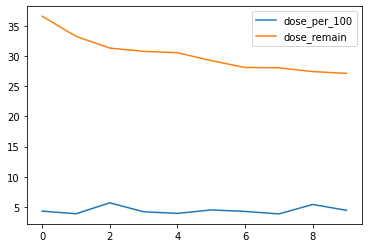

In [136]:
#This is unofficial plot to see two value's VS
top10=temp.head(10)
top10['dose_per_100'].plot()
top10['dose_remain'].plot()
plt.legend()

In [138]:
x=list(top10['province_state'])
y1 = top10['dose_per_100']
y2 = top10['dose_remain']

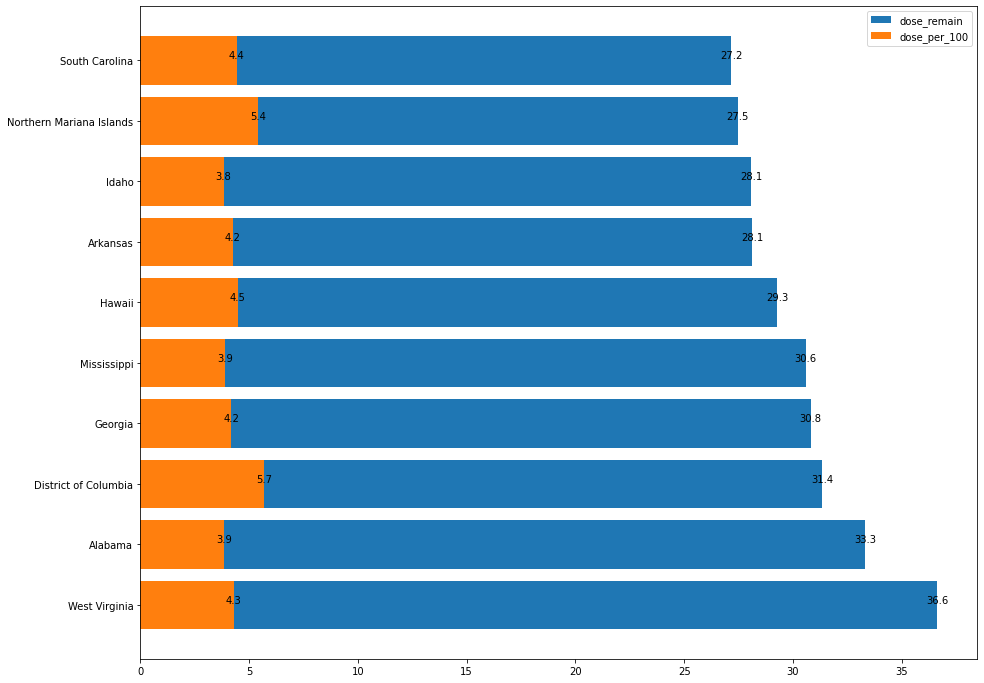

In [139]:

plt.figure(figsize=[15,12])
plt.barh(x,y2,label = 'dose_remain')
plt.barh(x,y1,label = 'dose_per_100')
for a,b in zip(x,y2):
    plt.text(b, a, round(b,1), ha='center',va = 'bottom',fontsize=10)
for a,b in zip(x,y1):
    plt.text(b, a, round(b,1), ha='center',va = 'bottom',fontsize=10)
plt.legend()

### Conclusion
#### We have captured the proportion of vaccines given per hundred of the state wise population and found out the remaining percentage of the unused vaccines for the entire data. We see that the majority of the states that have highest unused vaccines belong from the south east of the United States. 

# Question 2

### What are the top 10 states with the most covid tests taken & which test is the more dominant among PCR and Antigen in them?


In [65]:
%%sql
select * from Facts limit 10

 * postgresql://student@/FinalProject
10 rows affected.


province_state,confirmed,deaths,recovered,active,incident_rate,total_test_result,case_fatility_ratio,testing_rate,doses_allocated,doses_shipped,doses_admin,stage_one_doses,stage_two_doses,cases_confirmed,tests_viral_positive,tests_viral_negative,tests_viral_total,tests_antigen_positive,tests_antigen_total,people_viral_positive,people_viral_total,people_antigen_positive,people_antigen_total,encounters_viral_total,test_combined_total,people_fully_vaccinated,people_partially_vaccinated,state_key,date_key,vac_key
Alabama,295631,4102,174805.0,116724.0,6029.366625978828,2931535.0,1.3875405488598962,59788.3824493671,40950,None,None,None,None,None,None,None,2946488,None,None,244762,None,None,None,None,2946488,None,None,23,14,3
Alabama,301533,4124,174805.0,122604.0,6149.737364590567,2967252.0,1.3676778329403416,60516.82732754322,0,None,None,None,None,None,None,None,2994947,None,None,249849,None,None,None,None,2994947,None,None,23,243,6
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,40950,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,3
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,None,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,1
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,40950,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,5
Alabama,305640,4198,183625.0,117817.0,6233.49924589833,2994947.0,1.373511320507787,61081.664265166415,0,None,None,None,None,None,None,None,3017164,None,None,253364,None,None,None,None,3017164,None,None,23,67,6
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,40950,None,5181,5181,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,3
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,None,None,None,None,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,1
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,40950,None,5181,None,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,5
Alabama,310335,4254,183625.0,122456.0,6329.253332272799,3017164.0,1.3707767412634733,61534.777904566115,0,None,0,5181,None,None,None,None,3038900,None,None,257546,None,None,None,None,3038900,None,None,23,448,6


### Create another temp table

In [66]:
%%sql
DROP TABLE IF EXISTS TEMP2;

CREATE TABLE TEMP2 (
    province_state VARCHAR(100) PRIMARY KEY,
    PCR_base NUMERIC,
    Antigen_base NUMERIC,
    total_combined NUMERIC
    
);

 * postgresql://student@/FinalProject
Done.
Done.


[]

In [67]:
%%sql
INSERT INTO TEMP2
select province_state, max(tests_viral_total),max(tests_antigen_total),max(tests_viral_total) + max(tests_antigen_total) 
from Facts group by province_state

 * postgresql://student@/FinalProject
52 rows affected.


[]

In [68]:
%%sql
select * from TEMP2
order by TOTAL_COMBINED desc

 * postgresql://student@/FinalProject
52 rows affected.


province_state,pcr_base,antigen_base,total_combined
Delaware,None,None,None
New Jersey,16128805,None,None
New Mexico,5312466,None,None
Hawaii,None,None,None
Arkansas,4240583,None,None
South Dakota,1069205,None,None
District of Columbia,None,None,None
Indiana,15475299,None,None
Rhode Island,6065477,None,None
American Samoa,2140,None,None


### Cleaning the null values by setting them to zero

In [69]:
%%sql
UPDATE TEMP2
SET pcr_base = 0

where pcr_base is null


 * postgresql://student@/FinalProject
10 rows affected.


[]

In [70]:
%%sql
UPDATE TEMP2
SET antigen_base = 0

where antigen_base is null

 * postgresql://student@/FinalProject
30 rows affected.


[]

In [71]:
%%sql
UPDATE TEMP2
SET total_combined = pcr_base + antigen_base 

 * postgresql://student@/FinalProject
52 rows affected.


[]

In [72]:
%%sql 
select * from TEMP2
order by total_combined desc

 * postgresql://student@/FinalProject
52 rows affected.


province_state,pcr_base,antigen_base,total_combined
California,111075785,0,111075785
Texas,36925521,9206076,46131597
Florida,43901426,0,43901426
Illinois,39229345,0,39229345
Massachusetts,33563649,1466886,35030535
Ohio,18235991,5837680,24073671
North Carolina,17530250,2779210,20309460
Michigan,18542145,0,18542145
Georgia,13080553,3976085,17056638
New Jersey,16128805,0,16128805


 ###  Add pcr dose per dose and antigen dose per dose

In [73]:
%%sql
ALTER TABLE temp2 
ADD COLUMN pcr_per NUMERIC,
ADD COLUMN anti_per NUMERIC

 * postgresql://student@/FinalProject
Done.


[]

In [74]:
%%sql
UPDATE TEMP2

SET pcr_per = pcr_base/total_combined,
anti_per = antigen_base/total_combined
where total_combined != 0

 * postgresql://student@/FinalProject
44 rows affected.


[]

## The result

In [75]:
%%sql 
select * from TEMP2 order by total_combined desc

 * postgresql://student@/FinalProject
52 rows affected.


province_state,pcr_base,antigen_base,total_combined,pcr_per,anti_per
California,111075785,0,111075785,1.00000000000000000000,0E-28
Texas,36925521,9206076,46131597,0.80043881853905903149,0.19956118146094096851
Florida,43901426,0,43901426,1.00000000000000000000,0E-24
Illinois,39229345,0,39229345,1.00000000000000000000,0E-24
Massachusetts,33563649,1466886,35030535,0.95812550393535240041,0.04187449606464759959
Ohio,18235991,5837680,24073671,0.75750769377881753057,0.24249230622118246943
North Carolina,17530250,2779210,20309460,0.86315687369334290523,0.13684312630665709477
Michigan,18542145,0,18542145,1.00000000000000000000,0E-24
Georgia,13080553,3976085,17056638,0.76688928967127050477,0.23311071032872949523
New Jersey,16128805,0,16128805,1.00000000000000000000,0E-24


In [76]:
%%sql
set client_encoding='GBK';
Copy TEMP2
TO '/tmp/temp2.csv' WITH CSV header DELIMITER ',';

 * postgresql://student@/FinalProject
Done.
52 rows affected.


[]

In [77]:
!pwd

/home/ubuntu/notebooks/FinalProject


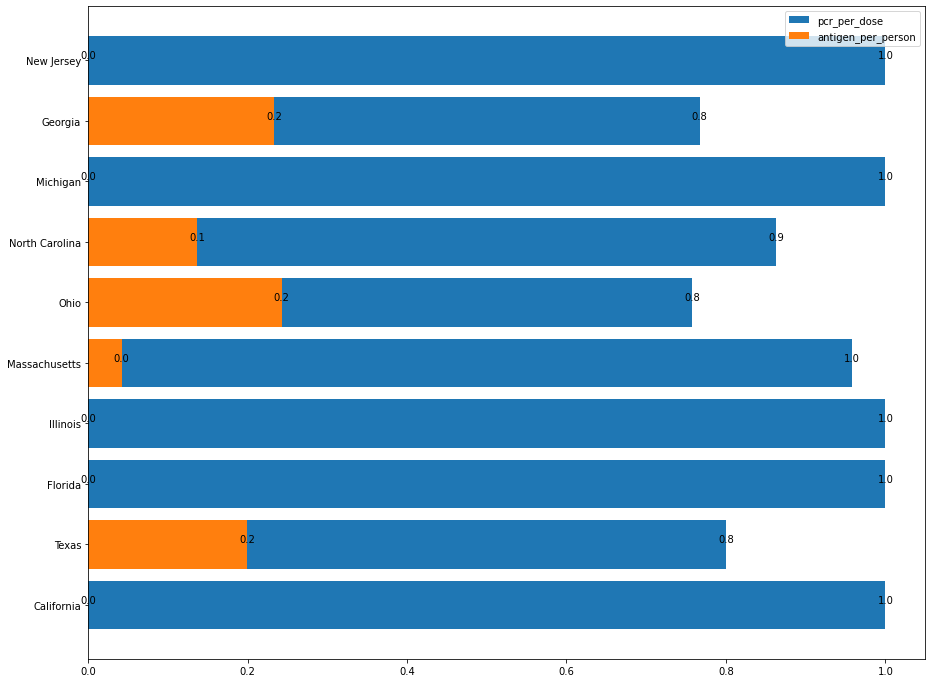

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
temp2 = pd.read_csv('/tmp/temp2.csv')
top10=temp2.sort_values(by = ['total_combined'],ascending = False).head(10)
x=list(top10['province_state'])
y1 = top10['pcr_per']
y2 = top10['anti_per']
plt.figure(figsize=[15,12])
plt.barh(x,y1,label = 'pcr_per_dose')
plt.barh(x,y2,label = 'antigen_per_person')
for a,b in zip(x,y2):
    plt.text(b, a, round(b,1), ha='center',va = 'bottom',fontsize=10)
for a,b in zip(x,y1):
    plt.text(b, a, round(b,1), ha='center',va = 'bottom',fontsize=10)
plt.legend()

### Conclusion
#### We have found the top 10 states with the highest number os tests done. Out of the top 10 states the percentage of PCR tests done is much more dominant compared to the number of Antigen tests done. From the graph, We can also conclude that the top 10 states prefer PCR test more than Antigen. The Percentage of PCR tests done ranges from 75 to 100 while the percentage of Antigen range from 0 to 25.


## Question 3
### How was the number of cases impacted during the holiday season (Christmas, 25th December 2020), and what was the impact on neighboring states of the most impacted state?


In [79]:
%%sql
SELECT 
 s.PROVINCE_STATE, s.FIPS, d.month_of_year_str, d.month_of_year, d.year,
 sum(confirmed) sum_confirmed,
 avg(confirmed) avg_confirmed,
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
 s.PROVINCE_STATE, d.month_of_year, d.month_of_year_str, s.FIPS, d.year
Having 
 d.month_of_year=12 and d.year=2020
Order by 
 avg_incident_rate desc
LIMIT(10)

 * postgresql://student@/FinalProject
10 rows affected.


province_state,fips,month_of_year_str,month_of_year,year,sum_confirmed,avg_confirmed,avg_incident_rate
North Dakota,38.0,December,12,2020,7448377,89739.481927710843,11775.876756446436
South Dakota,46.0,December,12,2020,7824765,94274.277108433735,10656.566779791280
Iowa,19.0,December,12,2020,23147440,266062.528735632184,8432.8566001905561494
Wisconsin,55.0,December,12,2020,41114085,489453.392857142857,8406.3364712617241667
Nebraska,31.0,December,12,2020,13084617,155769.250000000000,8052.5540630518486845
Utah,49.0,December,12,2020,21660191,248967.712643678161,7765.7821045590167701
Tennessee,47.0,December,12,2020,44262842,508768.298850574713,7449.9243810536196092
Rhode Island,44.0,December,12,2020,6594142,78501.690476190476,7410.2870009553376905
Idaho,16.0,December,12,2020,11230945,129091.321839080460,7223.6500540875938161
Wyoming,56.0,December,12,2020,3482224,41455.047619047619,7162.7478136923345893


In [80]:
%%sql
SELECT 
 s.PROVINCE_STATE, s.FIPS, d.month_of_year, 
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
 s.PROVINCE_STATE, d.month_of_year, d.month_of_year_str, s.FIPS, d.year
Having 
 (d.month_of_year=12 and d.year=2020)
AND   
    (s.FIPS=38 or s.FIPS=46 or s.FIPS=19 or s.FIPS=27 or s.FIPS=30 or s.FIPS=31 or s.FIPS=56)
Order by 
 avg_incident_rate desc
LIMIT(10)

 * postgresql://student@/FinalProject
6 rows affected.


province_state,fips,month_of_year,avg_incident_rate
North Dakota,38.0,12,11775.876756446436
South Dakota,46.0,12,10656.566779791280
Iowa,19.0,12,8432.8566001905561494
Nebraska,31.0,12,8052.5540630518486845
Wyoming,56.0,12,7162.7478136923345893
Minnesota,27.0,12,6989.3764067182918916


In [81]:
%matplotlib inline

<BarContainer object of 6 artists>

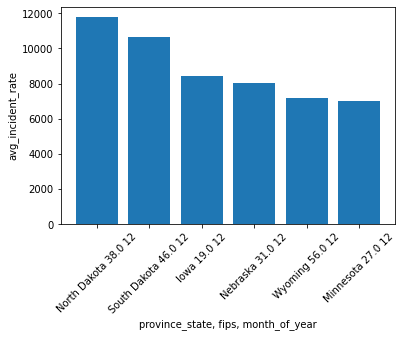

In [82]:
_.bar()

In [83]:
%%sql
SELECT 
 s.PROVINCE_STATE, s.FIPS, d.month_of_year_str, d.month_of_year, d.year,
 sum(confirmed) sum_confirmed,
 avg(confirmed) avg_confirmed,
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
 s.PROVINCE_STATE, d.month_of_year, d.month_of_year_str, s.FIPS, d.year
Having 
 d.month_of_year=1 and d.year=2021
Order by 
 avg_incident_rate desc
LIMIT(10)

 * postgresql://student@/FinalProject
10 rows affected.


province_state,fips,month_of_year_str,month_of_year,year,sum_confirmed,avg_confirmed,avg_incident_rate
North Dakota,38.0,January,1,2021,11820716,95328.354838709677,12509.264973021838
South Dakota,46.0,January,1,2021,12941816,104369.483870967742,11797.707802776860
Utah,49.0,January,1,2021,39089376,315236.903225806452,9832.8456962257912903
Tennessee,47.0,January,1,2021,82810868,667829.580645161290,9779.0681661524699677
Rhode Island,44.0,January,1,2021,12726468,102632.806451612903,9688.1805589985762903
Wisconsin,55.0,January,1,2021,69382704,559537.935483870968,9610.0348322346111935
Iowa,19.0,January,1,2021,37455020,302056.612903225806,9573.6897407419106774
Nebraska,31.0,January,1,2021,22284324,179712.290322580645,9290.2991676306470000
Arkansas,5.0,January,1,2021,32708180,263775.645161290323,8740.6486690749407258
Kansas,20.0,January,1,2021,31548884,254426.483870967742,8733.2324586696712258


In [84]:
%%sql
SELECT 
 s.PROVINCE_STATE, s.FIPS, d.month_of_year, 
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
 s.PROVINCE_STATE, d.month_of_year, d.month_of_year_str, s.FIPS, d.year
Having 
 (d.month_of_year=1 and d.year=2021)
AND   
    (s.FIPS=38 or s.FIPS=46 or s.FIPS=19 or s.FIPS=27 or s.FIPS=30 or s.FIPS=31 or s.FIPS=56)
Order by 
 avg_incident_rate desc
LIMIT(10)

 * postgresql://student@/FinalProject
6 rows affected.


province_state,fips,month_of_year,avg_incident_rate
North Dakota,38.0,1,12509.264973021838
South Dakota,46.0,1,11797.707802776860
Iowa,19.0,1,9573.6897407419106774
Nebraska,31.0,1,9290.2991676306470000
Wyoming,56.0,1,8370.4850350268363226
Minnesota,27.0,1,7823.3410470982915484


<BarContainer object of 6 artists>

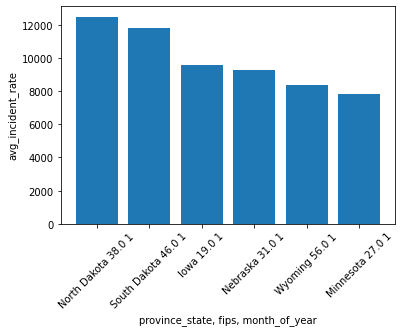

In [85]:
_.bar()

### Conclusion
#### To answer this question we looked at the average incident rate per state to see which state during the holiday season had the highest number of cases per 100,00s. North Dakota and South Dakota had the highest incident rates with their neighboring states having slightly lower rates. Overall, the incident rates increased from December 2020 to January 2021


## Question 4
### How did Delta Variant (May 31, 2021) affect cases, vaccination, and testing ? 

In [86]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(confirmed) sum_confirmed,
 avg(confirmed) avg_confirmed,
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=3 or d.month_of_year=7)
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,sum_confirmed,avg_confirmed,avg_incident_rate
March,3,2021,3879098797,530947.002053107035,8288.6816369027675723
April,4,2021,5390718714,575931.486538461538,8817.1772899951322679
May,5,2021,5834594748,603245.941687344913,9244.2847636460986424
June,6,2021,5748256914,614130.012179487179,9420.6469022015698759
July,7,2021,6043841400,624880.210918114144,9584.7426482180186050


In [87]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(confirmed) sum_confirmed
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=3 or d.month_of_year=7)
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,sum_confirmed
March,3,2021,3879098797
April,4,2021,5390718714
May,5,2021,5834594748
June,6,2021,5748256914
July,7,2021,6043841400


<BarContainer object of 5 artists>

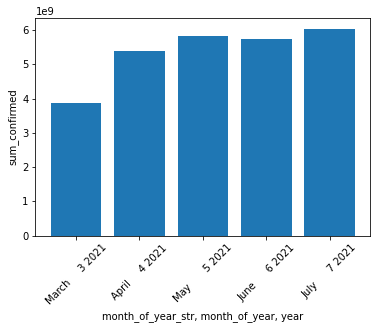

In [88]:
_.bar()

In [89]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
    avg(incident_rate) avg_incident_rate
FROM
 States S, Date D, Facts F
Where
 s.state_key=f.state_key and 
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=3 or d.month_of_year=7)
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,avg_incident_rate
March,3,2021,8288.6816369027675723
April,4,2021,8817.1772899951322679
May,5,2021,9244.2847636460986424
June,6,2021,9420.6469022015698759
July,7,2021,9584.7426482180186050


<BarContainer object of 5 artists>

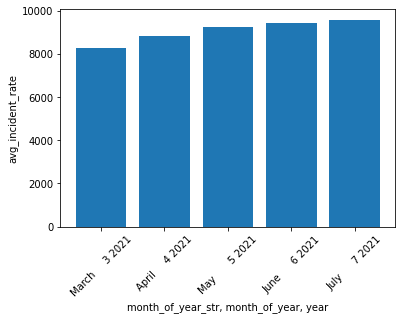

In [90]:
_.bar()

In [91]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(people_fully_vaccinated) fully_vaccinated,
 sum(people_partially_vaccinated) partially_vaccinated,
    sum(doses_admin) doses_administered
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=7 or d.month_of_year=3 )
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,fully_vaccinated,partially_vaccinated,doses_administered
March,3,2021,5478735907,4683951478,6059664246
April,4,2021,13599201840,7859139276,11386632019
May,5,2021,21790461948,6363455154,16123626826
June,6,2021,25399113126,4949953914,17961060104
July,7,2021,28753316652,4428443970,19988475956


In [92]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(people_fully_vaccinated) fully_vaccinated
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=7 or d.month_of_year=3 )
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,fully_vaccinated
March,3,2021,5478735907
April,4,2021,13599201840
May,5,2021,21790461948
June,6,2021,25399113126
July,7,2021,28753316652


<BarContainer object of 5 artists>

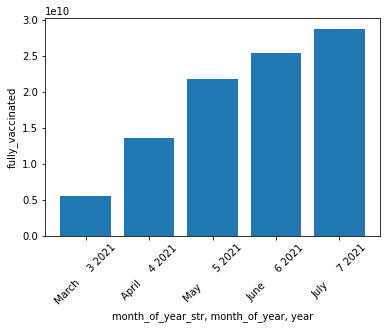

In [93]:
_.bar()

In [94]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(people_partially_vaccinated) partially_vaccinated
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=7 or d.month_of_year=3 )
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,partially_vaccinated
March,3,2021,4683951478
April,4,2021,7859139276
May,5,2021,6363455154
June,6,2021,4949953914
July,7,2021,4428443970


<BarContainer object of 5 artists>

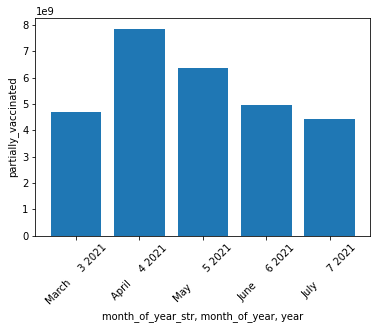

In [95]:
_.bar()

In [96]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
 sum(doses_admin) doses_admin
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=7 or d.month_of_year=3 )
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,doses_admin
March,3,2021,6059664246
April,4,2021,11386632019
May,5,2021,16123626826
June,6,2021,17961060104
July,7,2021,19988475956


<BarContainer object of 5 artists>

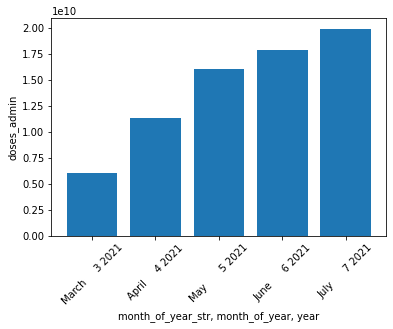

In [97]:
_.bar()

In [98]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
     sum(test_combined_total) total_tests,
    avg(test_combined_total) avg_tests
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=3 or d.month_of_year=7)
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,total_tests,avg_tests
March,3,2021,50695844831,6938933.045578976184
April,4,2021,73297212534,7830898.775000000000
May,5,2021,82699163634,8550368.448511166253
June,6,2021,84477290412,9025351.539743589744
July,7,2021,90792531660,9387151.743176178660


In [99]:
%%sql
SELECT 
    d.month_of_year_str, d.month_of_year, d.year, 
     sum(test_combined_total) total_tests
FROM
    Date D, Facts F
Where
 d.date_key=f.date_key 
Group by 
    d.month_of_year, d.year, d.month_of_year_str
Having 
 (d.month_of_year=4 or d.month_of_year=5 or d.month_of_year=6 or d.month_of_year=3 or d.month_of_year=7)
AND
   d.year=2021 
Order by 
 month_of_year asc

 * postgresql://student@/FinalProject
5 rows affected.


month_of_year_str,month_of_year,year,total_tests
March,3,2021,50695844831
April,4,2021,73297212534
May,5,2021,82699163634
June,6,2021,84477290412
July,7,2021,90792531660


<BarContainer object of 5 artists>

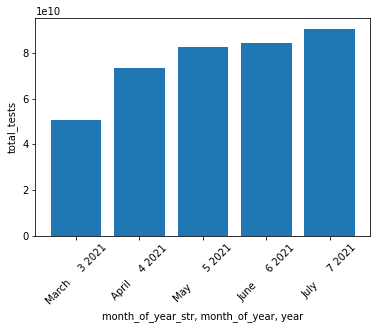

In [100]:
_.bar()

### Conclusion
We were trying to look at how the cases, vaccines, and testing were affected by the discovery o fthe Delta variant at the end of May. The trend for the few months around May show that basically all metrics increased except for those who were partially vaccinated. The number of cases, people fully vaccinated, and the total number of tests all showed increases around this time. People that are partially vaccinated did decrease however this could show that people were becoming fully vaccinated removing them from the partially vaccinated group.